<a href="https://colab.research.google.com/github/BaldoHenrique/Cotas_do_Paramentares_do_Senado/blob/main/Gastos_Senadores_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

**Versão 1:**
 - Leitura dos dados
 - Análise exploratória dos dados
 - Vizualização dos dados
 - Aplicação da Previsão de séries temporais

**Resumo:**
 - Foi feita a primeira a leitura dos dados, utilizado dados, apenas, dos últimos 4 anos. Desta forma foi possível ver qual senador gastou mais, quanto gastos, é possível ver também onde foram os seus maiores gastos. Porém para a série temporal dos gastos estes somente 4 anos não foram suficientes para uma boa predição, nas próximas versões iremos utilizar mais dados para a predição, diferentes modelos e diferentes parâmetros.

#Leitura e Limpeza dos dados

In [1]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.7 MB/s eta 0:00:00


In [2]:
#bibliotecas
import pandas as pd
import numpy as np

#gráficos
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt

#Models
from pmdarima.arima import auto_arima, ADFTest

import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import r2_score

In [3]:
#lendo o arquivo de 2022 para teste
df2022 = pd.read_csv('https://raw.githubusercontent.com/BaldoHenrique/Cotas_do_Paramentares_do_Senado/main/Dados_Bronze/despesa_ceaps_2022.csv',sep=';',encoding='latin-1')
#primeira vizualização                   
df2022.head(20)

ULTIMA ATUALIZACAO  \
ANO  MES SENADOR      TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                                         DOCUMENTO         DATA       DETALHAMENTO                                        VALOR_REEMBOLSADO   
2022 1   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 004.948.028-63     GILBERTO PISELO DO NASCIMENTO                      001/22            03/01/2022 Despesa com pagamento de aluguel de imóvel para...               6000   
                      Divulgação da atividade parlamentar                26.320.603/0001-64 INFORMANAHORA                                      000000000000310/A 04/01/2022 Despesa com divulgação da atividade parlamentar...               1500   
                                                                         13.659.201/0001-47 LINHA PURPURA FOTO E VIDEO LTDA                    107               14/01/2022 Despesa com produção de texto e edição de vídeo...               6000   
                                                                         23.652.846/0001-01 ROBERTO GUTIERREZ DA ROCHA M.E.I.                  187               18/01/2022 Divulgação da atividade parlamentar                              1000   
                                                                         08.941.827/0001-01 RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA LTDA 000000000001772/A 17/01/2022 Divulgação da atividade parlamentar                              2000   
                      Passagens aéreas, aquáticas e terrestres nacionais 17.872.428/0001-27 AMERICA VIAGENS E TURISMO LTDA - ME                ZTRPJB            24/01/2022 Companhia Aérea: LATAM, Localizador: ZTRPJB. Pa...            1000,36   
     2   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 004.948.028-63     GILBERTO PISELO DO NASCIMENTO                      002/22            02/02/2022 Despesa com pagamento de aluguel de imóvel para...               6000   
                      Contratação de consultorias, assessorias, pesqu... 13.659.201/0001-47 LINHA PURPURA FOTO E VIDEO LTDA                    116               14/02/2022 Despesa com produção de texto e edição de vídeo...               6000   
                      Divulgação da atividade parlamentar                26.320.603/0001-64 INFORMANAHORA                                      000000000000340/A 16/02/2022 Despesa com divulgação da atividade parlamentar...               1500   
                                                                         41.845.127/0001-99 J. J. M. CALADO EIRELI                             19                02/02/2022 Divulgação da atividade parlamentar                              1000   
                                                                         37.153.908/0001-45 JANAINA NUNES DE OLIVEIRA                          000000000000067/A 14/02/2022 Despesa com divulgação da atividade parlamentar                  1000   
                                                                                                                                               000000000000071/A 28/02/2022 Divulgação da atividade parlamentar no site O O...               1000   
                                                                         23.652.846/0001-01 ROBERTO GUTIERREZ DA ROCHA M.E.I.                  191               21/02/2022 Despesa com divulgação da atividade parlamentar                  1000   
                                                                         08.941.827/0001-01 RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA LTDA 000000000001797/A 21/02/2022 Divulgação da atividade parlamentar                              1000   
                                                                         30.637.754/0001-18 RUBENS COITINHO DOS SANTOS                         000000000000578/A 23/02/2022 Divulgação da atividade parlamentar                              1000   
                      Passagens aéreas, aquáticas e terres

In [4]:
#vendo o final da tabela
df2022.tail(20)

ULTIMA ATUALIZACAO  \
2022 12 ZEQUINHA MARINHO Aluguel de imóveis para escritório político, co... 04.895.728/0001-80 EQUATORIAL ENERGIA                                 030941553 09/12/2022 NaN                                                            141,38   
                                                                                                                                                  031147227 09/12/2022 NaN                                                            334,92   
                                                                            06.855.175/0007-52 SERVI SAN LTDA.                                    5044      14/12/2022 NaN                                                            4274,1   
                         Aquisição de material de consumo para uso no es... 08.672.139/0001-93 C2A SEVIÇOS EM TECNOLOGIA DA INFORMATICA EIRELI    8395      16/12/2022 NaN                                                               475   
                         Contratação de consultorias, assessorias, pesqu... 32.618.375/0001-06 CONSEX - CONSULTORIA PEDAGÓGICA                    048       13/12/2022 NaN                                                              3000   
                         Divulgação da atividade parlamentar                41.365.622/0001-09 RCM COMUNICAÇÃO E SERVIÇOS LTDA.                   3         01/02/2023 NaN                                                             14260   
                         Locomoção, hospedagem, alimentação, combustívei... 23.358.845/0001-59 AM & AP COMÉRCIO DE ALIMENTOS LTDA.-ME             29177     14/12/2022 NaN                                                                43   
                                                                            01.240.986/0001-30 AUTO POSTO FERROVIÁRIO LTDA.                       000140211 23/12/2022 NaN                                                               300   
                                                                                                                                                  000141428 26/12/2022 NaN                                                            300,01   
                                                                            19.614.800/0001-20 AUTO POSTO INDEPENDENCIA COMERCIO DE COMBUSTÍVE... 685963    02/12/2022 NaN                                                               200   
                                                                            34.307.872/0001-19 J M F COMÉRCIO DE COMBUSTIVEIS LTDA.               21169     04/12/2022 NaN                                                               300   
                                                                            09.631.455/0001-80 POSTO CAMILA VAREJISTA DE COMBUSTÍVEL LTDA. EPP    1446149   02/12/2022 NaN                                                             352,5   
                                                                            02.280.133/0042-62 POSTO ICCAR LTDA.                                  197440    07/12/2022 NaN                                                            200,03   
                                                                            28.298.039/0001-56 REDE POSTO POMBAL LTDA.                            000221800 09/12/2022 NaN                                                               200   
                         Passagens aéreas, aquáticas e terrestres nacionais 22.052.777/0001-32 Exceller Tour                                      SGKRFM    02/12/2022 Companhia Aérea: LATAM, Localizador: SGKRFM. Pa...            2849,45   
                                                                                                                                                  WIXHAI    06/12/2022 Companhia Aérea: LATAM, Localizador: WIXHAI. Pa...            2893,04   
                                                                                                                                          

- Como foi visto na tabela acima, os dados não estão muito bem formados na tabela, o objetivo é enteder como melhorar essa vizualização e deixar os dados padronizados.

In [5]:
# entender como esses dados estão distribuídos na tabela
df2022.iloc[0,:]

ULTIMA ATUALIZACAO    VALOR_REEMBOLSADO
27/04/2023 02:01          COD_DOCUMENTO
Name: (ANO, MES, SENADOR, TIPO_DESPESA, CNPJ_CPF, FORNECEDOR, DOCUMENTO, DATA, DETALHAMENTO), dtype: object

- Pudemos perceber que a tabela não tem colunas bem definidas como gostaríamos,vamos tornar a linha "1" cabeçalho das colunas

In [6]:
#lendo novamente o arquivo de 2022 para teste
df2022 = pd.read_csv('https://raw.githubusercontent.com/BaldoHenrique/Cotas_do_Paramentares_do_Senado/main/Dados_Bronze/despesa_ceaps_2022.csv',sep=';',encoding='latin-1',header=1)
#primeira vizualização                   
df2022.head(5)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000,2173617


In [7]:
#agora vamos juntar todos os últimos 4 anos em apenas uma tabela
df2021 = pd.read_csv('https://raw.githubusercontent.com/BaldoHenrique/Cotas_do_Paramentares_do_Senado/main/Dados_Bronze/despesa_ceaps_2021.csv',sep=';',encoding='latin-1',header=1)
df2020 = pd.read_csv('https://raw.githubusercontent.com/BaldoHenrique/Cotas_do_Paramentares_do_Senado/main/Dados_Bronze/despesa_ceaps_2020.csv',sep=';',encoding='latin-1',header=1)
df2019 = pd.read_csv('https://raw.githubusercontent.com/BaldoHenrique/Cotas_do_Paramentares_do_Senado/main/Dados_Bronze/despesa_ceaps_2019.csv',sep=';',encoding='latin-1',header=1)

In [8]:
#conferindo o tamanho das tabelas
print('tabela 2022:', df2022.shape)
print('tabela 2021:', df2021.shape)
print('tabela 2020:', df2020.shape)
print('tabela 2019:', df2019.shape)

tabela 2022: (16718, 11)
tabela 2021: (16827, 11)
tabela 2020: (14090, 11)
tabela 2019: (21634, 11)


In [9]:
#juntando as 4 tabelas em uma única
df = pd.concat([df2022,df2021,df2020,df2019], axis=0).reset_index(drop=True)

In [10]:
#vendo como ficou
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000,2173617


In [11]:
#conferindo o tamanho da tabela
df.shape

(69269, 11)

In [12]:
#tipo de cada coluna e dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69269 entries, 0 to 69268
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                69269 non-null  int64 
 1   MES                69269 non-null  int64 
 2   SENADOR            69269 non-null  object
 3   TIPO_DESPESA       69269 non-null  object
 4   CNPJ_CPF           69269 non-null  object
 5   FORNECEDOR         69269 non-null  object
 6   DOCUMENTO          66307 non-null  object
 7   DATA               69269 non-null  object
 8   DETALHAMENTO       38576 non-null  object
 9   VALOR_REEMBOLSADO  69269 non-null  object
 10  COD_DOCUMENTO      69269 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 5.8+ MB


- Podemos notar que a coluna "documentos" está faltando alguns dados e coluna "Detalhamento" esta faltando bastante dados, para isso iremos olhar estas com mais cuidado
- A coluna "valor_reembolsado" esta como objeto, pode ser transformada em inteiro ou float
- A "data" esta como objeto também, teremos que tranformar em datatime


In [13]:
#olhando todos os dados por colunas
print("Formato:", df.shape)
print("\n\n\n")
for coluna in df.columns:
  print(coluna + ": ")
  print(df[coluna].unique())
  print(df[coluna].describe())
  display (df[df[coluna].isnull()])
  print("\n\n\n")

Formato: (69269, 11)




ANO: 
[2022 2021 2020 2019]
count    69269.000000
mean      2020.413302
std          1.161825
min       2019.000000
25%       2019.000000
50%       2020.000000
75%       2021.000000
max       2022.000000
Name: ANO, dtype: float64


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO






MES: 
[ 1  2  3  4  5  6  7  8  9 10 11 12]
count    69269.000000
mean         6.584677
std          3.368768
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: MES, dtype: float64


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO






SENADOR: 
['ACIR GURGACZ' 'ALESSANDRO VIEIRA' 'ALEXANDRE SILVEIRA' 'ALVARO DIAS'
 'ANGELO CORONEL' 'ANTONIO ANASTASIA' 'CARLOS FÁVARO' 'CARLOS PORTINHO'
 'CARLOS VIANA' 'CHICO RODRIGUES' 'CHIQUINHO FEITOSA' 'CID GOMES'
 'CONFÚCIO MOURA' 'DANIELLA RIBEIRO' 'DÁRIO BERGER' 'DAVI ALCOLUMBRE'
 'DRA. EUDÓCIA' 'EDUARDO BRAGA' 'EDUARDO GIRÃO' 'EDUARDO GOMES'
 'EDUARDO VELLOSO' 'ELIANE NOGUEIRA' 'ELIZIANE GAMA' 'ELMANO FÉRRER'
 'ESPERIDIÃO AMIN' 'FABIANO CONTARATO' 'FABIO GARCIA'
 'FERNANDO BEZERRA COELHO' 'FERNANDO COLLOR' 'FERNANDO DUEIRE'
 'FLÁVIO ARNS' 'FLÁVIO BOLSONARO' 'GIORDANO' 'GUARACY SILVEIRA'
 'HUMBERTO COSTA' 'IRAJÁ' 'IVETE DA SILVEIRA' 'IZALCI LUCAS'
 'JADER BARBALHO' 'JAQUES WAGNER' 'JARBAS VASCONCELOS' 'JAYME CAMPOS'
 'JEAN PAUL PRATES' 'JORGINHO MELLO' 'JOSÉ ANÍBAL' 'JOSÉ SERRA'
 'JULIO VENTURA' 'KÁTIA ABREU' 'LASIER MARTINS' 'LEILA BARROS'
 'LUCAS BARRETO' 'LUIS CARLOS HEINZE' 'LUIZ CARLOS DO CARMO'
 'LUIZ PASTORE' 'MAILZA GOMES' 'MARA GABRILLI' 'MARCELO CASTRO'
 'MARCIO B

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO






TIPO_DESPESA: 
['Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.'
 'Divulgação da atividade parlamentar'
 'Passagens aéreas, aquáticas e terrestres nacionais'
 'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar'
 'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes'
 'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. '
 'Serviços de Segurança Privada']
count                                                 69269
unique                                                    7
top       Locomoção, hospedagem, alimentação, combustíve...
freq                                                  25516
Name: TIPO_DESPESA, dtype: object


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO






CNPJ_CPF: 
['004.948.028-63' '26.320.603/0001-64' '13.659.201/0001-47' ...
 '83.928.622/0001-01' '30.495.249/0001-86' '16.982.779/0001-28']
count                  69269
unique                  7667
top       16.978.175/0001-08
freq                    5217
Name: CNPJ_CPF, dtype: object


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO






FORNECEDOR: 
['GILBERTO PISELO DO NASCIMENTO' 'INFORMANAHORA'
 'LINHA PURPURA FOTO E VIDEO LTDA' ... 'Lokamig Rent a Car'
 'Posto Vila da Serra Ltda' 'Azul']
count                            69269
unique                            8685
top       ADRIA VIAGENS E TURISMO LTDA
freq                              2171
Name: FORNECEDOR, dtype: object


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO






DOCUMENTO: 
['001/22' '000000000000310/A' '107' ... 'WNQI4A' 'NCCPIM' 'MEYLWB']
count     66307
unique    55329
top         S/N
freq        303
Name: DOCUMENTO, dtype: object


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
173,2022,3,ALESSANDRO VIEIRA,"Locomoção, hospedagem, alimentação, combustíve...",17.630.688/0001-96,LOCADORA CB RENT A CAR,NaN,10/03/2022,NaN,270,2177596
174,2022,3,ALESSANDRO VIEIRA,"Locomoção, hospedagem, alimentação, combustíve...",17.630.688/0001-96,LOCADORA CB RENT A CAR,NaN,30/03/2022,NaN,270,2177597
318,2022,2,ALEXANDRE SILVEIRA,"Aluguel de imóveis para escritório político, c...",10.589.016/0001-35,GREENWICH EMPREENDIMENTOS LTDA,NaN,05/02/2022,NaN,"2914,82",2174617
319,2022,2,ALEXANDRE SILVEIRA,"Aluguel de imóveis para escritório político, c...",10.589.016/0001-35,GREENWICH EMPREENDIMENTOS LTDA,NaN,10/02/2022,NaN,6300,2174619
320,2022,2,ALEXANDRE SILVEIRA,"Aluguel de imóveis para escritório político, c...",18.715.383/0001-40,PREFEITURA DE BH,NaN,01/02/2022,NaN,"489,4",2174615
...,...,...,...,...,...,...,...,...,...,...,...
68540,2019,8,ZENAIDE MAIA,"Aluguel de imóveis para escritório político, c...",074.834.734-87,PAULO MEDEIROS DA SILVA,NaN,10/08/2019,NaN,2500,2128421
68577,2019,9,ZENAIDE MAIA,"Aluguel de imóveis para escritório político, c...",074.834.734-87,PAULO MEDEIROS DA SILVA,NaN,10/09/2019,NaN,2500,2130819
68624,2019,10,ZENAIDE MAIA,"Aluguel de imóveis para escritório político, c...",074.834.734-87,PAULO MEDEIROS DA SILVA,NaN,10/10/2019,NaN,2500,2132914
68653,2019,11,ZENAIDE MAIA,"Aluguel de imóveis para escritório político, c...",074.834.734-87,PAULO MEDEIROS DA SILVA,NaN,10/11/2019,NaN,2500,2134967






DATA: 
['03/01/2022' '04/01/2022' '14/01/2022' ... '26/10/2018' '07/10/2010'
 '14/10/2010']
count          69269
unique          1559
top       02/12/2019
freq             144
Name: DATA, dtype: object


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO






DETALHAMENTO: 
['Despesa com pagamento de aluguel de imóvel para uso do escritório político do Senador Acir Gurgacz em Ji-Paraná/RO.'
 'Despesa com divulgação da atividade parlamentar no website www.informanahora.com'
 'Despesa com produção de texto e edição de vídeo para divulgação da atividade parlamentar'
 ...
 'Companhia Aérea: GOL, Localizador: WNQI4A. Passageiros: GUITHYERRI SOUSA DE ALMEIDA (Matrícula 260979, COMISSIONADO), Voo: 1703 - CNF/BSB - 29/01/2019; BRÁULIO CAMPOS PIMENTA (Matrícula 237192, COMISSIONADO), Voo: 1703 - CNF/BSB - 29/01/2019;'
 'Companhia Aérea: LATAM, Localizador: NCCPIM. Passageiros: JOSÉ PERRELLA DE OLIVEIRA COSTA (Matrícula 247586, PARLAMENTAR), Voo: 3759 - CNF/SDU - 24/01/2019;'
 'Companhia Aérea: LATAM, Localizador: MEYLWB. Passageiros: JOSÉ PERRELLA DE OLIVEIRA COSTA (Matrícula 247586, PARLAMENTAR), Voo: 3026 - SDU/BSB - 29/01/2019;']
count                                                 38576
unique                                                

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
120,2022,1,ALESSANDRO VIEIRA,"Aluguel de imóveis para escritório político, c...",28.839.939/0001-63,CASA DESIGN SERVICOS DE APOIO ADMINISTRATIVO LTDA,1253,04/01/2022,NaN,500,2175348
121,2022,1,ALESSANDRO VIEIRA,"Aluguel de imóveis para escritório político, c...",06.028.059/0001-74,CASA SHOPPING DESING LTDA - EPP,1872,10/02/2022,NaN,3300,2175347
122,2022,1,ALESSANDRO VIEIRA,"Aluguel de imóveis para escritório político, c...",40.432.544/0107-03,CLARO S.A / NET,2201905697962,01/01/2022,NaN,"235,96",2174131
123,2022,1,ALESSANDRO VIEIRA,"Aluguel de imóveis para escritório político, c...",13.017.462/0001-63,ENERGISA,042.551.180,13/01/2022,NaN,"455,96",2174169
124,2022,1,ALESSANDRO VIEIRA,Aquisição de material de consumo para uso no e...,11.088.468/0001-04,KAFLEX COMERCIAL LTDA,00000001,23/02/2022,NaN,800,2175349
...,...,...,...,...,...,...,...,...,...,...,...
69250,2019,12,ZEQUINHA MARINHO,"Locomoção, hospedagem, alimentação, combustíve...",83.914.226/0001-25,SUPER POSTO EXPRESS LTDA,186514,03/12/2019,NaN,100,2137932
69259,2019,1,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",16.982.779/0001-28,Lokamig Rent a Car,116281,21/01/2019,NaN,1795,2113726
69260,2019,1,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",16.979.906/0001-30,Posto Vila da Serra Ltda,409512,03/01/2019,NaN,"225,54",2113378
69261,2019,1,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",16.979.906/0001-30,Posto Vila da Serra Ltda,411636,08/01/2019,NaN,"209,98",2113380






VALOR_REEMBOLSADO: 
['6000' '1500' '1000' ... '1168,1' '772,05' '1755,17']
count     69269
unique    31837
top         100
freq       1747
Name: VALOR_REEMBOLSADO, dtype: object


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO






COD_DOCUMENTO: 
[2173614 2173615 2173616 ... 2114101 2113826 2113830]
count    6.926900e+04
mean     2.153623e+06
std      2.254455e+04
min      2.112846e+06
25%      2.134358e+06
50%      2.153660e+06
75%      2.172856e+06
max      2.197488e+06
Name: COD_DOCUMENTO, dtype: float64


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO


**Colunas:** Algumas observações
- Ano: temos mais gastos por unidade no ano de 2020 ou nos anos ao lado;
- Mês: Podemos ver que distribuição dos gastos esta um pouco puxada para os meses finais do ano;
- Senador: Carlos Viana foi o Senador que mais vezes aparece em nossa tabela com 2136 de 69269;
- Tipo de despesa: temos ao total 7 tipos de despesas, a mais utilizada é 'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes', com mais de 1/3, 25516 de 69269;
- CNPJ/CPF: Temos que verificar se temos um padrão bem definido
- Fornecedor:  "ADRIA VIAGENS E TURISMO LTDA" foi a que mais apareceu com 2171 vezes, em 29269;
- Documento: Aqui temos problemas e precisamos limpar os dados, o que mais aparece é S/N e 2962 valores faltantes que iremos preencher com S/N. Neste caso S/N significa que o estabelecimento não preencheu corretamente o documento ou ficou faltando.
- Data: A data que mais aparece é 02/12/2019 com 144 vezes.
- Detalhamento: Bastantes valores faltantes, 30693 de 69269, número bastante elevado, vamos alterar os valores faltantes para "sem detalhamento",  
- Valor reembolsado: O valor que mais foi usado foi o de 100 reais, 1747 vezes. Altear o tipo para Float.
- Cod documento: Olhar se tem algum padrão

In [14]:
#Verificar a coluna MES para fazer as mudanças necessárias
print(df["MES"].unique())
print(df["MES"].describe())
display (df[df["MES"].isnull()])

[ 1  2  3  4  5  6  7  8  9 10 11 12]
count    69269.000000
mean         6.584677
std          3.368768
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: MES, dtype: float64


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO


In [15]:
# #vamos colocar o "0" na coluna mês para todas as linhas terem dois números
# for i in range(len(df)):
#   if len(str(df.loc[i,'MES'])) == 1:
#     df.loc[i,'MES'] = '0'+str(df.loc[i,'MES'])

#preferimos não utilizar esse código por enquanto

In [16]:
#Verificar a coluna documentos para fazer as mudanças necessárias
print(df["DOCUMENTO"].unique())
print(df["DOCUMENTO"].describe())
display (df[df["DOCUMENTO"].isnull()])

['001/22' '000000000000310/A' '107' ... 'WNQI4A' 'NCCPIM' 'MEYLWB']
count     66307
unique    55329
top         S/N
freq        303
Name: DOCUMENTO, dtype: object


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
173,2022,3,ALESSANDRO VIEIRA,"Locomoção, hospedagem, alimentação, combustíve...",17.630.688/0001-96,LOCADORA CB RENT A CAR,NaN,10/03/2022,NaN,270,2177596
174,2022,3,ALESSANDRO VIEIRA,"Locomoção, hospedagem, alimentação, combustíve...",17.630.688/0001-96,LOCADORA CB RENT A CAR,NaN,30/03/2022,NaN,270,2177597
318,2022,2,ALEXANDRE SILVEIRA,"Aluguel de imóveis para escritório político, c...",10.589.016/0001-35,GREENWICH EMPREENDIMENTOS LTDA,NaN,05/02/2022,NaN,"2914,82",2174617
319,2022,2,ALEXANDRE SILVEIRA,"Aluguel de imóveis para escritório político, c...",10.589.016/0001-35,GREENWICH EMPREENDIMENTOS LTDA,NaN,10/02/2022,NaN,6300,2174619
320,2022,2,ALEXANDRE SILVEIRA,"Aluguel de imóveis para escritório político, c...",18.715.383/0001-40,PREFEITURA DE BH,NaN,01/02/2022,NaN,"489,4",2174615
...,...,...,...,...,...,...,...,...,...,...,...
68540,2019,8,ZENAIDE MAIA,"Aluguel de imóveis para escritório político, c...",074.834.734-87,PAULO MEDEIROS DA SILVA,NaN,10/08/2019,NaN,2500,2128421
68577,2019,9,ZENAIDE MAIA,"Aluguel de imóveis para escritório político, c...",074.834.734-87,PAULO MEDEIROS DA SILVA,NaN,10/09/2019,NaN,2500,2130819
68624,2019,10,ZENAIDE MAIA,"Aluguel de imóveis para escritório político, c...",074.834.734-87,PAULO MEDEIROS DA SILVA,NaN,10/10/2019,NaN,2500,2132914
68653,2019,11,ZENAIDE MAIA,"Aluguel de imóveis para escritório político, c...",074.834.734-87,PAULO MEDEIROS DA SILVA,NaN,10/11/2019,NaN,2500,2134967


In [17]:
#Alterando os valores nulos por "S/N" para não ter valores nulos em nossa análise
df['DOCUMENTO'] = df['DOCUMENTO'].fillna('S/N') 

In [18]:
#Verificar a coluna Data para fazer as mudanças, caso necessário necessárias
print(df["DATA"].unique())
print(df["DATA"].describe())
display (df[df["DATA"].isnull()])

['03/01/2022' '04/01/2022' '14/01/2022' ... '26/10/2018' '07/10/2010'
 '14/10/2010']
count          69269
unique          1559
top       02/12/2019
freq             144
Name: DATA, dtype: object


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO


In [19]:
df.DATA.unique

<bound method Series.unique of 0        03/01/2022
1        04/01/2022
2        14/01/2022
3        18/01/2022
4        17/01/2022
            ...    
69264    19/01/2019
69265    24/01/2019
69266    29/01/2019
69267    23/01/2019
69268    26/01/2019
Name: DATA, Length: 69269, dtype: object>

- Verificamos que existem datas que divegem da coluna Mês e Ano, vamos criar a coluna DATA1 no formato datatime para melhorar a análise.

In [20]:
# A coluna Dia para depois podemos fazer as análises necessárias
df['DATA1'] = pd.to_datetime(df['DATA'], errors='coerce',dayfirst=True) 
df['DIA'] = df['DATA1'].dt.day
print(df["DATA1"].unique())
print(df["DATA1"].describe())
display (df[df["DATA1"].isnull()])

['2022-01-03T00:00:00.000000000' '2022-01-04T00:00:00.000000000'
 '2022-01-14T00:00:00.000000000' ... '2018-10-26T00:00:00.000000000'
 '2010-10-07T00:00:00.000000000' '2010-10-14T00:00:00.000000000']
count                   69266
unique                   1556
top       2019-12-02 00:00:00
freq                      144
first     2000-12-08 00:00:00
last      2023-12-23 00:00:00
Name: DATA1, dtype: object


<ipython-input-20-a562e978d89a>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df["DATA1"].describe())


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA1,DIA
18866,2021,11,CARLOS VIANA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,ADRIA VIAGENS E TURISMO LTDA,YK1QHD,29/10/0202,"Companhia Aérea: AZUL, Localizador: YK1QHD. Pa...","339,9",2169237,NaT,NaN
43907,2020,5,PLÍNIO VALÉRIO,Divulgação da atividade parlamentar,27.209.437/0001-96,Excelsior Comunicação Digital Ltda,2020/9,05/05/0202,NaN,1150,2144535,NaT,NaN
58621,2019,1,LÚCIA VÂNIA,"Aluguel de imóveis para escritório político, c...",08.573.731/0001-38,LDE Contabilidade e Administração de Condomíni...,0107007,31/01/0219,Taxa condominial,"271,26",2114251,NaT,NaN


In [21]:
#Podemos ver que 3 datas não conseguiram ser transformadas e ficaram nulas, vamos primeiramente arrumar 
# essas datas para depois olhar mais perto para as datas que são divergentes da coluna MES e ANO
df.loc[43907,"DATA"] = "05/05/2020" 
df.loc[58621,"DATA"] = "31/01/2019" 

# no Index 18866 o formato da data esta incorreto e diverge das colunas Ano e Mes, sabemos que tem mais casos como este, 
# portando vamos arrumar o formato e depois ver quais medidas tomar em relação ao divergência
df.loc[18866,"DATA"] = "29/10/2020" 

In [22]:
#Rodadando novamente para ver se o erro foi corrigido
df['DATA1'] = pd.to_datetime(df['DATA'], errors='coerce',dayfirst=True) 
df['DIA'] = df['DATA1'].dt.day
print(df["DATA1"].unique())
print(df["DATA1"].describe())
display (df[df["DATA1"].isnull()])

['2022-01-03T00:00:00.000000000' '2022-01-04T00:00:00.000000000'
 '2022-01-14T00:00:00.000000000' ... '2018-10-26T00:00:00.000000000'
 '2010-10-07T00:00:00.000000000' '2010-10-14T00:00:00.000000000']
count                   69269
unique                   1556
top       2019-12-02 00:00:00
freq                      144
first     2000-12-08 00:00:00
last      2023-12-23 00:00:00
Name: DATA1, dtype: object


<ipython-input-22-8f8c611e521a>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df["DATA1"].describe())


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,DATA1,DIA


In [23]:
# Vamos ver as datas em ordem
df.DATA1.sort_values()

4032    2000-12-08
13967   2002-02-02
12777   2002-02-11
16926   2002-02-19
45892   2002-03-14
           ...    
2747    2023-03-27
2739    2023-03-27
10230   2023-11-23
707     2023-12-20
12690   2023-12-23
Name: DATA1, Length: 69269, dtype: datetime64[ns]

- É possível ver que temos datas bem estranhas para o contexto do nosso dataset, datas como 2002, muito antigas e datas 2023 que estão no futuro. A nossa análise deveria ser apenas entre 2019 e 2022
- Agora vamos olhar outro problema constatado, a divergencia entre mes e ano entre as colunas MES, ANO e DATA.

In [24]:
# Vamos analisar os valores divergêntes
n_data_divergente = 0
for i in range(len(df)):
  if df.loc[i,"DATA"][3:4]=='0':
   mes = df.loc[i,"DATA"][4:5]
  else:
   mes = df.loc[i,"DATA"][3:5]
  if str(df.loc[i,"ANO"]) != df.loc[i,"DATA"][6:10] or str(df.loc[i,"MES"]) != df.loc[i,"DATA"][3:5]:
    n_data_divergente+=1
    # df.loc[i,"DATA"] = df.loc[i,"DATA"][0:2]+"/"+str(df.loc[i,"MES"])+"/"+str(df.loc[i,"ANO"])
    
print('número de datas divergentes:', n_data_divergente)

número de datas divergentes: 54681


- Tivemos 54681 valores diferentes, percebemos que esta estratégia não foi eficaz e não poderemos utilizar a informação da coluna "data" como referência, apenas os valores das colunas "Ano" e "Mes".

In [25]:
#Criando uma data 'nova', no formato DATATIME, com os as colunas Ano e Mes, pois os valores estão divergentes na colunada "data", assim foi preferível manter estes como corretos.
for i in range(len(df)):
  df.loc[i,'Mês/Ano'] = str(df.loc[i,'ANO'])+ "/" + str(df.loc[i,'MES'])  + "/" +  "01" 

df['Mês/Ano'] = pd.to_datetime(df['Mês/Ano'], errors='coerce', format="%Y/%m") 

In [26]:
# Aqui vamos excluir as datas que não utilizaremos em nossas análises e vizualizações
df = df.drop(columns= ['DATA','DATA1','DIA']) 

In [27]:
#Verificar a coluna Detalhamento para fazer as mudanças, caso necessário necessárias
print(df["DETALHAMENTO"].unique())
print(df["DETALHAMENTO"].describe())
display (df[df["DETALHAMENTO"].isnull()])

['Despesa com pagamento de aluguel de imóvel para uso do escritório político do Senador Acir Gurgacz em Ji-Paraná/RO.'
 'Despesa com divulgação da atividade parlamentar no website www.informanahora.com'
 'Despesa com produção de texto e edição de vídeo para divulgação da atividade parlamentar'
 ...
 'Companhia Aérea: GOL, Localizador: WNQI4A. Passageiros: GUITHYERRI SOUSA DE ALMEIDA (Matrícula 260979, COMISSIONADO), Voo: 1703 - CNF/BSB - 29/01/2019; BRÁULIO CAMPOS PIMENTA (Matrícula 237192, COMISSIONADO), Voo: 1703 - CNF/BSB - 29/01/2019;'
 'Companhia Aérea: LATAM, Localizador: NCCPIM. Passageiros: JOSÉ PERRELLA DE OLIVEIRA COSTA (Matrícula 247586, PARLAMENTAR), Voo: 3759 - CNF/SDU - 24/01/2019;'
 'Companhia Aérea: LATAM, Localizador: MEYLWB. Passageiros: JOSÉ PERRELLA DE OLIVEIRA COSTA (Matrícula 247586, PARLAMENTAR), Voo: 3026 - SDU/BSB - 29/01/2019;']
count                                                 38576
unique                                                22478
top       DES

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,Mês/Ano
120,2022,1,ALESSANDRO VIEIRA,"Aluguel de imóveis para escritório político, c...",28.839.939/0001-63,CASA DESIGN SERVICOS DE APOIO ADMINISTRATIVO LTDA,1253,NaN,500,2175348,2022-01-01
121,2022,1,ALESSANDRO VIEIRA,"Aluguel de imóveis para escritório político, c...",06.028.059/0001-74,CASA SHOPPING DESING LTDA - EPP,1872,NaN,3300,2175347,2022-01-01
122,2022,1,ALESSANDRO VIEIRA,"Aluguel de imóveis para escritório político, c...",40.432.544/0107-03,CLARO S.A / NET,2201905697962,NaN,"235,96",2174131,2022-01-01
123,2022,1,ALESSANDRO VIEIRA,"Aluguel de imóveis para escritório político, c...",13.017.462/0001-63,ENERGISA,042.551.180,NaN,"455,96",2174169,2022-01-01
124,2022,1,ALESSANDRO VIEIRA,Aquisição de material de consumo para uso no e...,11.088.468/0001-04,KAFLEX COMERCIAL LTDA,00000001,NaN,800,2175349,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...
69250,2019,12,ZEQUINHA MARINHO,"Locomoção, hospedagem, alimentação, combustíve...",83.914.226/0001-25,SUPER POSTO EXPRESS LTDA,186514,NaN,100,2137932,2019-12-01
69259,2019,1,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",16.982.779/0001-28,Lokamig Rent a Car,116281,NaN,1795,2113726,2019-01-01
69260,2019,1,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",16.979.906/0001-30,Posto Vila da Serra Ltda,409512,NaN,"225,54",2113378,2019-01-01
69261,2019,1,ZEZÉ PERRELLA,"Locomoção, hospedagem, alimentação, combustíve...",16.979.906/0001-30,Posto Vila da Serra Ltda,411636,NaN,"209,98",2113380,2019-01-01


In [28]:
#Como quase metade dos dados são nulos/faltantes, preenchemos eles como "sem detalhamento"
df['DETALHAMENTO'] = df['DETALHAMENTO'].fillna('Sem Detalhamento') 

In [29]:
#Verificar a coluna VALOR_REEMBOLSADO para fazer as mudanças, caso necessário necessárias
print(df["VALOR_REEMBOLSADO"].unique())
print(df["VALOR_REEMBOLSADO"].describe())
display (df[df["VALOR_REEMBOLSADO"].isnull()])

['6000' '1500' '1000' ... '1168,1' '772,05' '1755,17']
count     69269
unique    31837
top         100
freq       1747
Name: VALOR_REEMBOLSADO, dtype: object


,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,Mês/Ano


In [30]:
#precisamos subtituir a ',' por '.' para que o programa leia os valores corretamente, ai iremos tranforma-los em (FLOAT)
df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'].str.replace(',','.')
df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'].astype(float)

In [31]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,Mês/Ano
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,Despesa com pagamento de aluguel de imóvel par...,6000.0,2173614,2022-01-01
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,Despesa com divulgação da atividade parlamenta...,1500.0,2173615,2022-01-01
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,Despesa com produção de texto e edição de víde...,6000.0,2173616,2022-01-01
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,Divulgação da atividade parlamentar,1000.0,2173618,2022-01-01
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,Divulgação da atividade parlamentar,2000.0,2173617,2022-01-01


# Visualizações

In [32]:
#Olhar com calma a coluna dos senadores e ver quais análises podemos fazer
print(df["SENADOR"].unique())
print(df["SENADOR"].describe())
display (df[df["SENADOR"].isnull()])

['ACIR GURGACZ' 'ALESSANDRO VIEIRA' 'ALEXANDRE SILVEIRA' 'ALVARO DIAS'
 'ANGELO CORONEL' 'ANTONIO ANASTASIA' 'CARLOS FÁVARO' 'CARLOS PORTINHO'
 'CARLOS VIANA' 'CHICO RODRIGUES' 'CHIQUINHO FEITOSA' 'CID GOMES'
 'CONFÚCIO MOURA' 'DANIELLA RIBEIRO' 'DÁRIO BERGER' 'DAVI ALCOLUMBRE'
 'DRA. EUDÓCIA' 'EDUARDO BRAGA' 'EDUARDO GIRÃO' 'EDUARDO GOMES'
 'EDUARDO VELLOSO' 'ELIANE NOGUEIRA' 'ELIZIANE GAMA' 'ELMANO FÉRRER'
 'ESPERIDIÃO AMIN' 'FABIANO CONTARATO' 'FABIO GARCIA'
 'FERNANDO BEZERRA COELHO' 'FERNANDO COLLOR' 'FERNANDO DUEIRE'
 'FLÁVIO ARNS' 'FLÁVIO BOLSONARO' 'GIORDANO' 'GUARACY SILVEIRA'
 'HUMBERTO COSTA' 'IRAJÁ' 'IVETE DA SILVEIRA' 'IZALCI LUCAS'
 'JADER BARBALHO' 'JAQUES WAGNER' 'JARBAS VASCONCELOS' 'JAYME CAMPOS'
 'JEAN PAUL PRATES' 'JORGINHO MELLO' 'JOSÉ ANÍBAL' 'JOSÉ SERRA'
 'JULIO VENTURA' 'KÁTIA ABREU' 'LASIER MARTINS' 'LEILA BARROS'
 'LUCAS BARRETO' 'LUIS CARLOS HEINZE' 'LUIZ CARLOS DO CARMO'
 'LUIZ PASTORE' 'MAILZA GOMES' 'MARA GABRILLI' 'MARCELO CASTRO'
 'MARCIO BITTAR' 'MARCOS

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,Mês/Ano


In [33]:
#qual foi o gasto do senador Carlos Viana, o que mais aparece na lista, nesses últimos 4 anos?
print("Total de gastos do Senador Carlos Viana entre 2019 e 2022:","R$",str(df[df['SENADOR']=='CARLOS VIANA'].VALOR_REEMBOLSADO.sum()).replace('.',','))

Total de gastos do Senador Carlos Viana entre 2019 e 2022: R$ 1306418,45


In [34]:
#Ver quais são os senadores que mais aparecem na lista, os 10 primeiros
df['SENADOR'].value_counts()[0:10]

CARLOS VIANA           2136
JAQUES WAGNER          2077
WELLINGTON FAGUNDES    1976
HUMBERTO COSTA         1930
PAULO PAIM             1867
LUIS CARLOS HEINZE     1765
ZEQUINHA MARINHO       1741
FABIANO CONTARATO      1554
FLÁVIO ARNS            1547
TELMÁRIO MOTA          1537
Name: SENADOR, dtype: int64

In [35]:
df['SENADOR'].value_counts()[0:10].index

Index(['CARLOS VIANA', 'JAQUES WAGNER', 'WELLINGTON FAGUNDES',
       'HUMBERTO COSTA', 'PAULO PAIM', 'LUIS CARLOS HEINZE',
       'ZEQUINHA MARINHO', 'FABIANO CONTARATO', 'FLÁVIO ARNS',
       'TELMÁRIO MOTA'],
      dtype='object')

In [36]:
#Os 10 primeiros em quantidade de vezes que aparecem na lista de reembolso
fig = px.bar(df['SENADOR'].value_counts()[0:10], width=800, height=300)
fig.show()

In [37]:
# vamos ver o total de gastos desses 10 primeiros
lista_senador = []
lista_gasto_total = []
lista_utiliza_rembolso = []
for i in df['SENADOR'].value_counts()[0:10].index:
  lista_senador.append(i)
  lista_gasto_total.append(df[df['SENADOR']==i].VALOR_REEMBOLSADO.sum())
  lista_utiliza_rembolso.append(df[df['SENADOR']==i].SENADOR.count())
  print("Total de gastos -","Senador:", i, "       Valor:","R$",str(df[df['SENADOR']==i].VALOR_REEMBOLSADO.sum()).replace('.',','))

Total de gastos - Senador: CARLOS VIANA        Valor: R$ 1306418,45
Total de gastos - Senador: JAQUES WAGNER        Valor: R$ 1640880,43
Total de gastos - Senador: WELLINGTON FAGUNDES        Valor: R$ 1671934,35
Total de gastos - Senador: HUMBERTO COSTA        Valor: R$ 1502329,79
Total de gastos - Senador: PAULO PAIM        Valor: R$ 1078519,85
Total de gastos - Senador: LUIS CARLOS HEINZE        Valor: R$ 1346962,08
Total de gastos - Senador: ZEQUINHA MARINHO        Valor: R$ 1698140,72
Total de gastos - Senador: FABIANO CONTARATO        Valor: R$ 562350,97
Total de gastos - Senador: FLÁVIO ARNS        Valor: R$ 733724,0900000001
Total de gastos - Senador: TELMÁRIO MOTA        Valor: R$ 1951401,21


In [38]:
#Ver necessidade de manter esse dataframe

# d = {"Senadores":lista_senador,"Gastos Totais":lista_gasto_total,"Utilização do Reembolso":lista_utiliza_rembolso}
# df_gastos_senadores = pd.DataFrame(data=d)
# df_gastos_senadores

In [39]:
#Os 10 primeiros em quantidade de vezes que aparecem na lista de reembolso e o total gasto em cada um
fig = px.bar(x=lista_senador,y=lista_gasto_total,width=800, height=300)
fig.show()

In [40]:
fig = px.pie(values=lista_gasto_total, names=lista_senador,title='Gastos dos senadores(%)',width=600, height=400)
fig.show()

In [41]:
#É possível perceber que quem utilizou mais vezes as verbas não foi quem mais gastou, então agora vamos ver quem são os que mais gastaram
lista_gastos = df.groupby(['SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)[0:10]
lista_gastos

SENADOR
TELMÁRIO MOTA          1951401.21
ROGÉRIO CARVALHO       1928300.49
MECIAS DE JESUS        1913241.64
PAULO ROCHA            1885315.28
MAILZA GOMES           1793120.58
ROBERTO ROCHA          1727057.62
ZEQUINHA MARINHO       1698140.72
ELIZIANE GAMA          1694229.21
EDUARDO BRAGA          1683525.68
WELLINGTON FAGUNDES    1671934.35
Name: VALOR_REEMBOLSADO, dtype: float64

In [42]:
#Os 10 primeiros que mais gastaram
fig = px.bar(lista_gastos, width=800, height=300)
fig.show()

In [43]:
lista_gastos["TELMÁRIO MOTA"]

1951401.21

In [44]:
#Há uma relação entre os que mais aparecem com os que mais gastam no total?
soma_de_gastos = 0
for i in df['SENADOR'].value_counts()[0:10].index:
  if i in lista_gastos.index:
    print(i,":",lista_gastos[i])
    soma_de_gastos += lista_gastos[i]
print("A soma total destes senadores:", soma_de_gastos)

WELLINGTON FAGUNDES : 1671934.35
ZEQUINHA MARINHO : 1698140.72
TELMÁRIO MOTA : 1951401.21
A soma total destes senadores: 5321476.28


In [45]:
#3 dos que mais aparecem na lista estão entre os que mais gastaram nos 4 anos de mandato, vamos ver quanto esses 3 representam em relação ao total gasto
fig = px.pie(values=[soma_de_gastos,df['VALOR_REEMBOLSADO'].sum()-soma_de_gastos], names=["WELLINGTON FAGUNDES, ZEQUINHA MARINHO, TELMÁRIO MOTA","Resto dos senadores"],
             title='Gastos dos senadores(%)',width=600, height=300)
fig.show()

In [46]:
df.groupby(['SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)[0:10]

SENADOR
TELMÁRIO MOTA          1951401.21
ROGÉRIO CARVALHO       1928300.49
MECIAS DE JESUS        1913241.64
PAULO ROCHA            1885315.28
MAILZA GOMES           1793120.58
ROBERTO ROCHA          1727057.62
ZEQUINHA MARINHO       1698140.72
ELIZIANE GAMA          1694229.21
EDUARDO BRAGA          1683525.68
WELLINGTON FAGUNDES    1671934.35
Name: VALOR_REEMBOLSADO, dtype: float64

In [47]:
lista_gastos["Outros Senadores"] = df.groupby(['SENADOR'])['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)[10:].sum()

In [48]:
#Agora vamos ver quanto representa o gastos dos 10 senadores que mais gastaram em relação ao resto


fig = px.pie(values=[10,df['SENADOR'].nunique()-10], names=['10 senadores', "Outros"],
             title='Gastos dos 10 senadores que mais gastaram em %',width=1000, height=500)
fig.show()


fig = px.pie(values=lista_gastos.values, names=lista_gastos.index,
             title='Quanto representa o 10 primeiros senadores em %',width=1000, height=500)
fig.show()

In [49]:
#fazer uma análise anual e mensal, para ver se temos algum padrão de gastos entre eles
df.groupby(["MES"])['VALOR_REEMBOLSADO'].sum()

MES
1      6280450.13
2      7681860.71
3      8295566.79
4      7545312.09
5      8200320.85
6      7877367.58
7      7564942.29
8      8301859.10
9      7821873.05
10     8672738.37
11     9203802.57
12    10441126.02
Name: VALOR_REEMBOLSADO, dtype: float64

In [50]:
#Gastos mês a mês de todos os senadores
fig = px.bar(df.groupby(["MES"])['VALOR_REEMBOLSADO'].sum(), width=800, height=300)
fig.show()

#Moledo Forecast

In [51]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO,Mês/Ano
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,Despesa com pagamento de aluguel de imóvel par...,6000.0,2173614,2022-01-01
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,Despesa com divulgação da atividade parlamenta...,1500.0,2173615,2022-01-01
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,Despesa com produção de texto e edição de víde...,6000.0,2173616,2022-01-01
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,Divulgação da atividade parlamentar,1000.0,2173618,2022-01-01
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,Divulgação da atividade parlamentar,2000.0,2173617,2022-01-01


In [52]:
# #Criando uma data com os as colunas Ano e Mes, pois os valores estão divergentes na colunada "data", assim foi preferível manter estes como corretos.
# for i in range(len(df)):
#   df.loc[i,'Mês/Ano'] = str(df.loc[i,'ANO'])+ "/" + str(df.loc[i,'MES'])  + "/" +  "01" 

# df['Mês/Ano'] = pd.to_datetime(df['Mês/Ano'], errors='coerce', format="%Y/%m") 

In [53]:
#plotar serie temporal - vamos criar uma tabela que contenha apenas data os valores gastos
valores_gastos = df.groupby(['Mês/Ano'])['VALOR_REEMBOLSADO'].sum()
valores_gastos

Mês/Ano
2019-01-01    1598389.68
2019-02-01    1720293.88
2019-03-01    1879841.79
2019-04-01    2036964.21
2019-05-01    2197949.53
2019-06-01    2199537.09
2019-07-01    1880208.80
2019-08-01    2185251.87
2019-09-01    2194227.97
2019-10-01    2498802.24
2019-11-01    2409187.95
2019-12-01    2447587.39
2020-01-01    1394867.81
2020-02-01    1995004.61
2020-03-01    1898897.77
2020-04-01    1370273.52
2020-05-01    1424952.36
2020-06-01    1337697.28
2020-07-01    1443425.10
2020-08-01    1474374.82
2020-09-01    1699203.99
2020-10-01    1740068.00
2020-11-01    1816168.43
2020-12-01    2819989.91
2021-01-01    1480043.35
2021-02-01    1722629.43
2021-03-01    1789766.34
2021-04-01    1729045.62
2021-05-01    2012278.79
2021-06-01    2124626.29
2021-07-01    2047952.63
2021-08-01    2542257.54
2021-09-01    2294229.27
2021-10-01    2337155.23
2021-11-01    2529827.34
2021-12-01    2410512.01
2022-01-01    1807149.29
2022-02-01    2243932.79
2022-03-01    2727060.89
2022-04-01    240

In [54]:
valores_gastos.values

array([1598389.68, 1720293.88, 1879841.79, 2036964.21, 2197949.53,
       2199537.09, 1880208.8 , 2185251.87, 2194227.97, 2498802.24,
       2409187.95, 2447587.39, 1394867.81, 1995004.61, 1898897.77,
       1370273.52, 1424952.36, 1337697.28, 1443425.1 , 1474374.82,
       1699203.99, 1740068.  , 1816168.43, 2819989.91, 1480043.35,
       1722629.43, 1789766.34, 1729045.62, 2012278.79, 2124626.29,
       2047952.63, 2542257.54, 2294229.27, 2337155.23, 2529827.34,
       2410512.01, 1807149.29, 2243932.79, 2727060.89, 2409028.74,
       2565140.17, 2215506.92, 2193355.76, 2099974.87, 1634211.82,
       2096712.9 , 2448618.85, 2763036.71])

In [55]:
# #arrumando o dataset para que fique apenas com colunas e valores relevantes para aplicar um modelos de forecast
# df_novo = pd.DataFrame(df.groupby(['ANO','MES'])['VALOR_REEMBOLSADO'].sum()).reset_index()
# df_novo

# df_novo['Ano/Mes'] = str(df_novo['ANO'])+"/"+str(df_novo['MES'])

# for i in range(len(df_novo)):
#   df_novo.loc[i,'Ano/Mes'] = str(df_novo.loc[i,'ANO'])+ "/" + str(df_novo.loc[i,'MES'])  + "/" +  "01" 

#   df_novo['Ano/Mes'] = pd.to_datetime(df_novo['Ano/Mes'], errors='coerce', format="%Y/%m/%d") 

# df_novo['Ano/Mes'] = pd.to_datetime(df_novo['Ano/Mes'], errors='coerce', format="%Y/%m/%d") 

# df_novo

In [56]:
# Plotando em um gráfico de série em linha
fig = px.line(valores_gastos, width=1000, height=400)
fig.show()

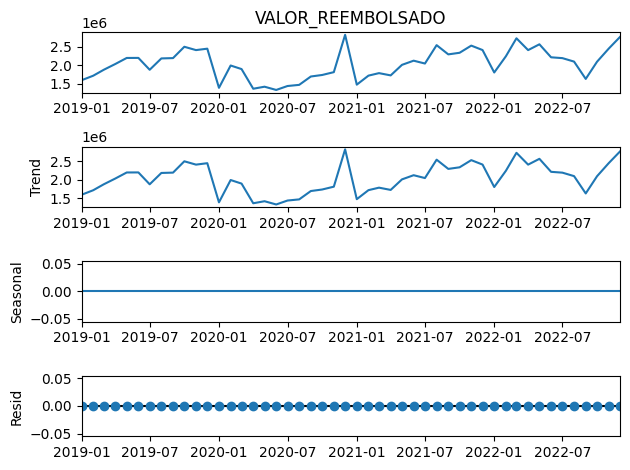

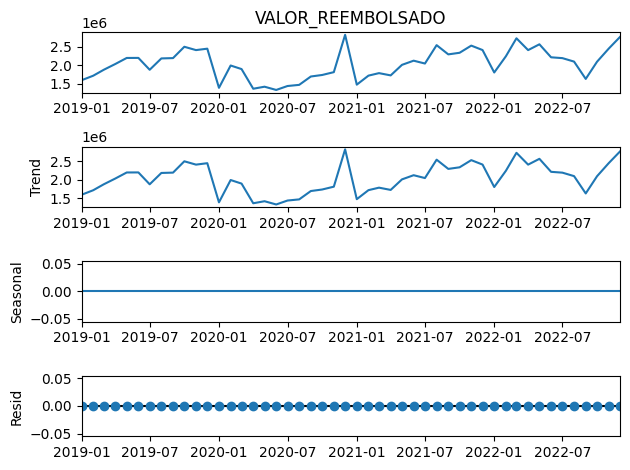

In [57]:
# mais vizualizações das séries
decompose = seasonal_decompose(valores_gastos, period=1)
decompose.plot()

In [58]:
#esta função nos diz se a nossa série é estacionária ou não, pelos gráficos anteriores é possivel ter uma noção, o valores se tem uma tendencia a se repetir anualmente
def eh_estacionaria(timeseries):
  dftest = adfuller(timeseries, autolag = 'AIC')
  dfoutput = pd.Series(dftest[0:4], index= ['Estatística do teste', 'p-value','O critério de informação maximizado', 'Número de observações usadas'])
  for key,value in dftest[4].items():
      dfoutput['Valor crítico (%s)'%key] = value

  if (dfoutput['Estatística do teste'] < dfoutput['Valor crítico (5%)'] and dfoutput['p-value'] < 0.05):
      print('É estacionária.')
  else:
      print('Não é estacionária.')

In [59]:
eh_estacionaria(valores_gastos)

É estacionária.


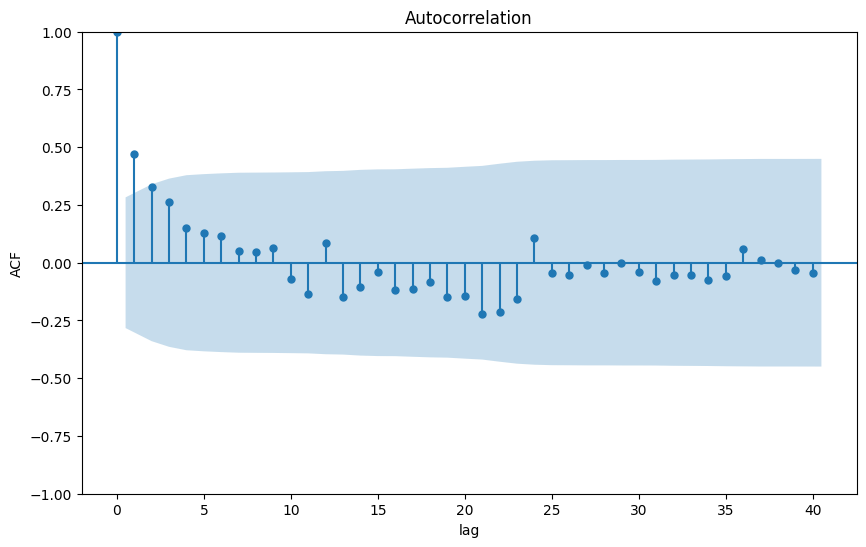

In [60]:
# Teste de Autocorrelação
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(valores_gastos, lags=40, ax=ax)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



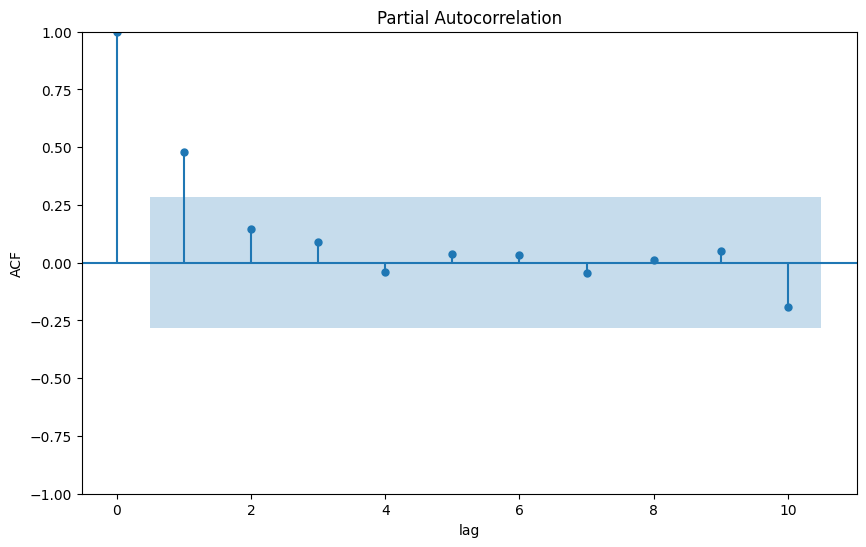

In [61]:
# Teste de autocorrelação parcial
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(valores_gastos, lags=10, ax=ax)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

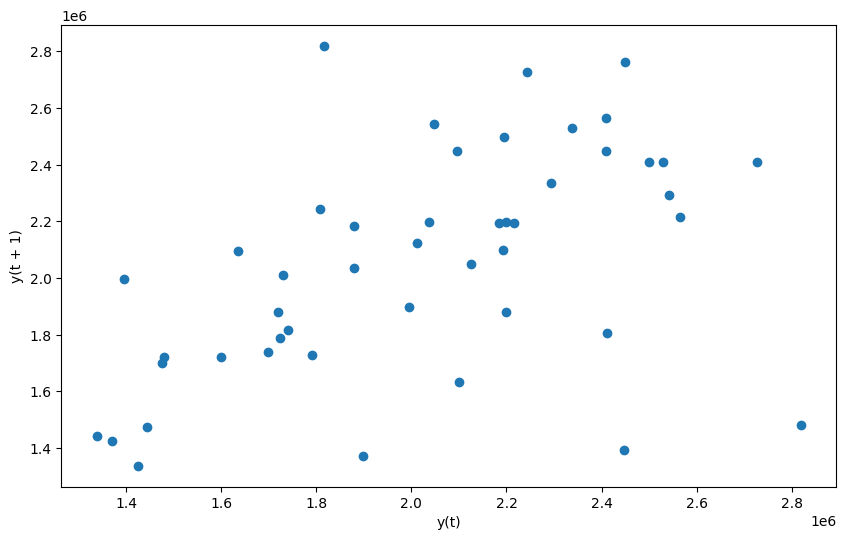

In [62]:
# gráfico plota todos os pontos, podemos ver a distribuição deles
fig, ax = plt.subplots(figsize=(10, 6))
lag_plot(valores_gastos, ax=ax)

In [63]:
# ! pip install pmdarima

In [64]:
# from pmdarima.arima import auto_arima, ADFTest

In [65]:
#fazendo testes

# serve para sabermos, quais paramêtros devemos usar em nosso modelo

mod_arima = auto_arima(valores_gastos, seasonal = False)
print(mod_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -680.194
Date:                Thu, 04 May 2023   AIC                           1366.388
Time:                        17:01:10   BIC                           1372.001
Sample:                    01-01-2019   HQIC                          1368.509
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.023e+06   2.66e+05      3.852      0.000    5.03e+05    1.54e+06
ar.L1          0.4998      0.120      4.160      0.000       0.264       0.735
sigma2      1.175e+11      1.960      6e+10      0.0

In [66]:
#fazendo testes

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(valores_gastos)

(0.3806239218459775, True)

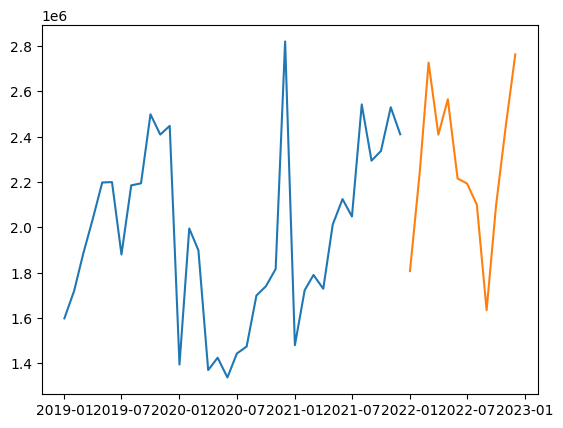

In [67]:
#Separando o dataset em train e test

train = valores_gastos[:36]
test = valores_gastos[36:]
plt.plot(train)
plt.plot(test)

In [68]:
print(train,test)

Mês/Ano
2019-01-01    1598389.68
2019-02-01    1720293.88
2019-03-01    1879841.79
2019-04-01    2036964.21
2019-05-01    2197949.53
2019-06-01    2199537.09
2019-07-01    1880208.80
2019-08-01    2185251.87
2019-09-01    2194227.97
2019-10-01    2498802.24
2019-11-01    2409187.95
2019-12-01    2447587.39
2020-01-01    1394867.81
2020-02-01    1995004.61
2020-03-01    1898897.77
2020-04-01    1370273.52
2020-05-01    1424952.36
2020-06-01    1337697.28
2020-07-01    1443425.10
2020-08-01    1474374.82
2020-09-01    1699203.99
2020-10-01    1740068.00
2020-11-01    1816168.43
2020-12-01    2819989.91
2021-01-01    1480043.35
2021-02-01    1722629.43
2021-03-01    1789766.34
2021-04-01    1729045.62
2021-05-01    2012278.79
2021-06-01    2124626.29
2021-07-01    2047952.63
2021-08-01    2542257.54
2021-09-01    2294229.27
2021-10-01    2337155.23
2021-11-01    2529827.34
2021-12-01    2410512.01
Name: VALOR_REEMBOLSADO, dtype: float64 Mês/Ano
2022-01-01    1807149.29
2022-02-01    22439

In [69]:
#aplicando esse código para retornar quais os melhores parametros para utilizar no treino do modelo
arima_model = auto_arima(train ,start_p=0, d=0, start_q=0,
                         max_p = 5, max_d = 5, max_q = 5, start_P = 0,
                         D=0 , start_Q = 0, max_P=5, Max_D = 5, 
                         max_Q=5, m=12, seasonal = True,
                         error_action = 'warn', trace = True,
                         supress_warning=True, stepwise =True,
                         random_state=20, n_fits =50)

arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1032.638, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1027.000, Time=0.20 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1031.351, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1148.834, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1025.894, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1026.450, Time=0.12 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1028.433, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1025.761, Time=0.07 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1026.603, Time=0.26 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=1026.424, Time=0.14 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=1028.411, Time=0.25 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=1027.511, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1027.729, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1026.375, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -508.881
Date:                Thu, 04 May 2023   AIC                           1025.761
Time:                        17:01:13   BIC                           1032.095
Sample:                    01-01-2019   HQIC                          1027.972
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.828e+05   4.23e+05      1.852      0.064   -4.58e+04    1.61e+06
ar.L1          0.3617      0.144      2.510      0.012       0.079       0.644
ar.L2          0.2413      0.196      1.233      0.218      -0.142       0.625
sigma2      1.126e+11      5.687   1.98e+10      0.000    1.13e+11    1.13e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.26
Prob(Q):                              0.89   Prob(JB):                         0.12
Heteroskedasticity (H):               2.09   Skew:                            -0.25
Prob(H) (two-sided):                  0.21   Kurtosis:                         4.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.52e+25. Standard errors may be unstable.
"""

In [70]:
#aqui aplicamos o modelo e criamos uma tabela com os valores de teste, para comparar os resultados
prediction = pd.DataFrame(arima_model.predict(n_periods = 12) , index= test.index )
prediction.columns = ['predição dos gastos']
prediction

,predição dos gastos
Mês/Ano,
2022-01-01,2.265335e+06
2022-02-01,2.184024e+06
2022-03-01,2.119575e+06
2022-04-01,2.076639e+06
2022-05-01,2.045553e+06
2022-06-01,2.023947e+06
2022-07-01,2.008629e+06
2022-08-01,1.997874e+06
2022-09-01,1.990287e+06


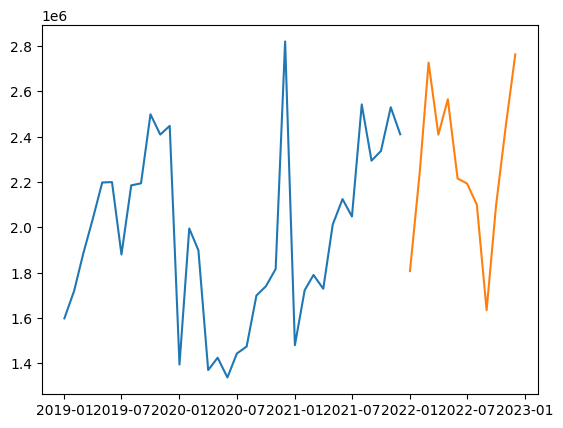

In [71]:
#plotando o real
plt.plot(train)
plt.plot(test)

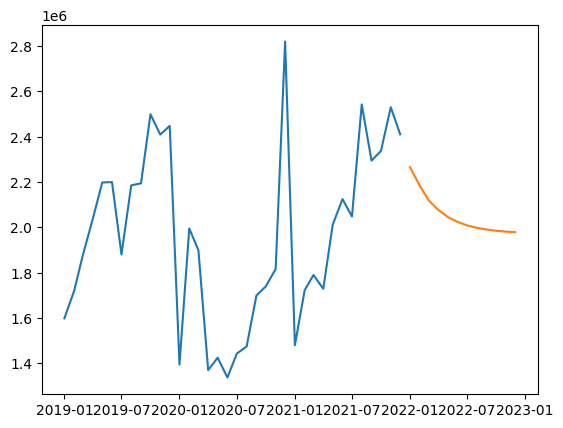

In [72]:
#plotando os valores gerados
plt.plot(train)
plt.plot(arima_model.predict(n_periods = 12))

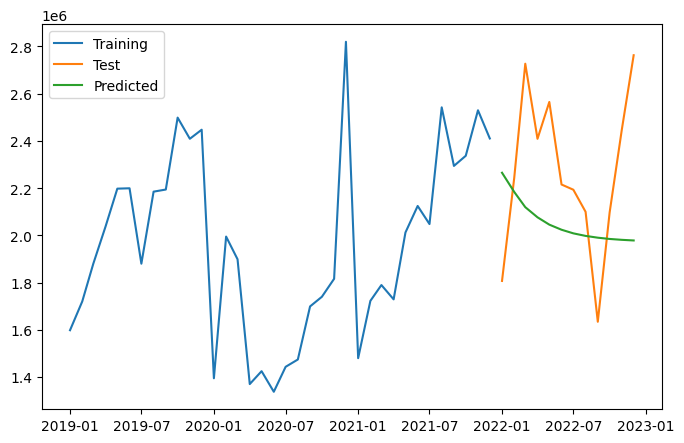

In [73]:
# Aqui temos o plot em um unico gráfico
plt.figure(figsize=(8,5))
plt.plot(train,label = "Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = "upper left")
plt.show()

In [74]:
# vamos ver a métrica gerada do r2_score
r2_score(test.values, prediction)

-0.5796871037979934

Podemos perceber que os resultados foram bem ruins, continuaremos os testes nas proximas versões

In [75]:
# #ARIMA

# mod = statsmodels.tsa.arima.model.ARIMA(df_novo.VALOR_REEMBOLSADO,
#                                         trend = 'n',
#                                         order = (1,0,0))
# results = mod.fit()
# print(results.summary())

In [76]:
#SARIMA

# mod = statsmodels.tsa.arima_model.SARIMAX(timeseries['y'],
#                                           trend = 'n',
#                                           order = (8,1,5),
#                                           seasonal_order = (0,1,2,7),
#                                           enforce_invertibility = False)
# results = mod.fit()

#conteúdos para aprender
  - https://medium.com/techbloghotmart/dicas-para-criar-um-modelo-de-previs%C3%A3o-de-s%C3%A9ries-temporais-d4bb2e32e148

  - https://www.youtube.com/watch?v=s_M82zr1hPU&t=127s

  - https://medium.com/techbloghotmart/o-que-s%C3%A3o-s%C3%A9ries-temporais-e-como-aplicar-em-machine-learning-6ea5d94bec78

  - https://facebook.github.io/prophet/?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Ci%C3%AAncia+de+Dados+3%2F7%3A+Forecasting&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Java%29+Dia+3%2F7%3A+Modelando+um+dom%C3%ADnio